In [8]:
import numpy as np                  # linear algebra
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import h5py                         # for processing the hdfs datasets
import glob
import readligo as rl

sampleData = 'H-H1_LOSC_4_V1-815411200-4096.hdf5'
strain, time, channel_dict = rl.loaddata(sampleData)
ts = time[1] - time[0]      #-- Time between samples
fs = int(1.0 / ts)          #-- Sampling frequency

#-- Choose a few seconds of "good data"
segList = rl.dq_channel_to_seglist(channel_dict['DEFAULT'], fs)
length = 16  # seconds
strain_seg = strain[segList[0]][0:(length*fs)]
time_seg = time[segList[0]][0:(length*fs)]

TypeError: 'NoneType' object has no attribute '__getitem__'

In [2]:
ligoDataPaths = glob.glob(".\datasets\*.hdf5")
print ligoDataPaths

['.\\datasets\\H-H1_LOSC_16_V1-1126259446-32.hdf5', '.\\datasets\\H-H1_LOSC_4_V1-1126259446-32.hdf5', '.\\datasets\\L-L1_LOSC_16_V1-1126259446-32.hdf5', '.\\datasets\\L-L1_LOSC_4_V1-1126259446-32.hdf5']


In [3]:
sample = ligoDataPaths[0]
f = h5py.File(sample, 'r')

def printname(name):
    print name
f.visit(printname)

strain = f['strain']['Strain'][0:100] ### First 100
strainMore = f['strain'].values()[0]  ### All data
print strain[5]      ### 5th element
print strainMore[...] ### All data

meta = f['meta']['UTCstart'][()]
print meta
metaTwo = f['meta']['Detector'][()]
print metaTwo

metaKeys = f['meta'].keys()
metaThree = f['meta']
for key in metaKeys:
    print key, metaThree[key].value
    
strain = f['strain']['Strain'].value
print strain
ts = f['strain']['Strain'].attrs['Xspacing']
print ts
# for i in xrange(200):
#     meta = f['meta']['UTCstart'][()][i]    ## Slices UTC Time string
#     print meta

meta = f['meta']
gpsStart = meta['GPSstart'].value
duration = meta['Duration'].value
gpsEnd = gpsStart + duration
time = np.arange(gpsStart,gpsEnd,ts)
print time ### Time vector
f.close()

meta
meta/Description
meta/DescriptionURL
meta/Detector
meta/Duration
meta/GPSstart
meta/Observatory
meta/Type
meta/UTCstart
quality
quality/detail
quality/injections
quality/injections/InjDescriptions
quality/injections/InjShortnames
quality/injections/Injmask
quality/simple
quality/simple/DQDescriptions
quality/simple/DQShortnames
quality/simple/DQmask
strain
strain/Strain
2.03591807585e-19
[  2.16321104e-19   2.25019564e-19   2.04984247e-19 ...,   6.30032225e-20
   7.40379976e-20   6.15540036e-20]
2015-09-14T09:50:30
H1
Description Strain data time series from LIGO
DescriptionURL http://losc.ligo.org/
Detector H1
Duration 32
GPSstart 1126259446
Observatory H
Type StrainTimeSeries
UTCstart 2015-09-14T09:50:30
[  2.16321104e-19   2.25019564e-19   2.04984247e-19 ...,   6.30032225e-20
   7.40379976e-20   6.15540036e-20]
6.103515625e-05
[  1.12625945e+09   1.12625945e+09   1.12625945e+09 ...,   1.12625948e+09
   1.12625948e+09   1.12625948e+09]


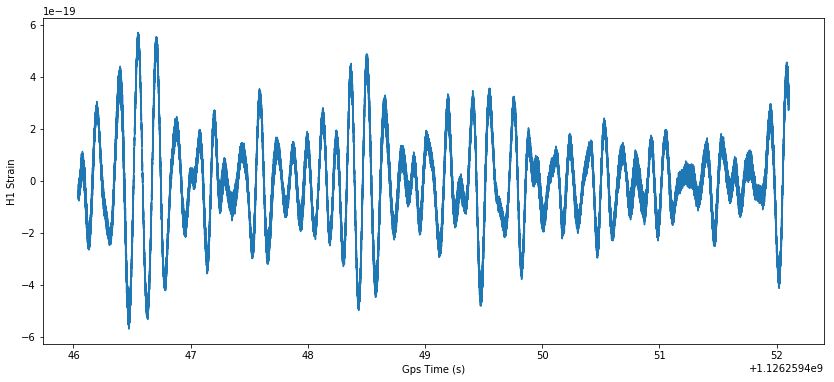

In [4]:
period = 100000
plt.figure(figsize = (14, 6))
plt.plot(time[700:period], strain[700:period])
plt.xlabel('Gps Time (s)')
plt.ylabel('H1 Strain')
plt.show()

In [5]:
#------------------------------------------
# Apply a Blackman Window, and plot the FFT
#------------------------------------------
# window = np.blackman(strain_seg.size)
# windowed_strain = strain_seg*window
# freq_domain = np.fft.fft(windowed_strain)
# freq = np.arange(0, fs, 1.0/length)
# plt.loglog( freq, abs(freq_domain)/fs)
# plt.axis([10, fs/2.0, 1e-24, 1e-18])
# plt.grid('on')
# plt.xlabel('Freq (Hz)')
# plt.ylabel('Strain / Hz')

In [6]:
plt.figure(figsize = (14, 6))
i = 0
col = ['r', 'g', 'b', 'k']
for fname in ligodatapath:
    d = h5py.File(path.join(dirpath, fname), "r")
    strain = list(d['strain'].values())[0]
    plt.plot(strain[...], color= col[i], label = fname, markersize = 1)
    i += 1
    d.close()
plt.legend()
plt.show()
## more timeseries work needed to mathc events with time stamps
# %%

NameError: name 'ligodatapath' is not defined